<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/opt_parm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Optimización paramétrica con Grind

Nombre: Biología de sistemas 

Fecha: 7 de diciembre

Cargar Grind.R

In [2]:
install.packages("deSolve")
install.packages("FME")
install.packages("rootSolve")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rootSolve’, ‘coda’, ‘minpack.lm’, ‘minqa’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
source("Grind.R")

Loading required package: coda



grind.R was sourced


# Optimización paramétrica

Podemos ajustar los parámetros de un modelo a datos usando la función *fit()*. Si la función es llamada sin ningún argumento, se asume que hay un *data.frame* llamado data con nombres de columnas correspondientes a las variables del modelo, y *fit()* usará el estado, *s*, y todos los parámetros, *p*, como un intento inicial para ajustar los parámetros a los datos.



La función entrega un objeto que contiene los parámetros estimados, rangos de confianza, y correlación entre los parámetros. Llamar *fit()$par* regresa los parámetros. El argumento *free* de la función permite seleccionar que parámetros serán estimados (*free* es un vector de nombres). La opción *initial = TRUE* puede ser usada para leer las condiciones iniciales de los datos. 


## Modelo de Lotka Volterra

In [5]:
model <- function(time, state, parms) {
  with(as.list(c(state, parms)),{

    dR <- r*R*(1-R/K) - a*R*N
    dN <- c*a*R*N - delta*N

    return(list(c(dR, dN)))
  })
}

En el la ecuación del recurso ($R$) el término $r*R(1-R/K)$ da cuenta de un crecimiento logístico. Mientras que el término $a*R*N$ (ley de acción de masas) implica que el consumo del recurso por el depredador ($N$) es proporcional a la cantidad de recurso. En la ecuación del depredador, el término $c*a*R*N$ implica que la velocidad de crecimiento es proporcional al consumo. Finalmente el término $delta*N$ implica una tasa de muerte constante 

Establecer valor de parámetros y condiciones iniciales

In [6]:
p <- c(r=1, K=1, a=1, c=1, delta=0.5) # vector de parámetros
s <- c(R=1, N=0.01) # vector de condiciones iniciales

Nota importante: las derivadas en la función *model()* deben ser especificadas en el mismo orden que en el vector de condiciones iniciales *s*

Los nombres *model*, *s*, y *p* son las designaciones por dafault para los valores de modelo, estado y parámetros en las funciones de Grind

Crear datos

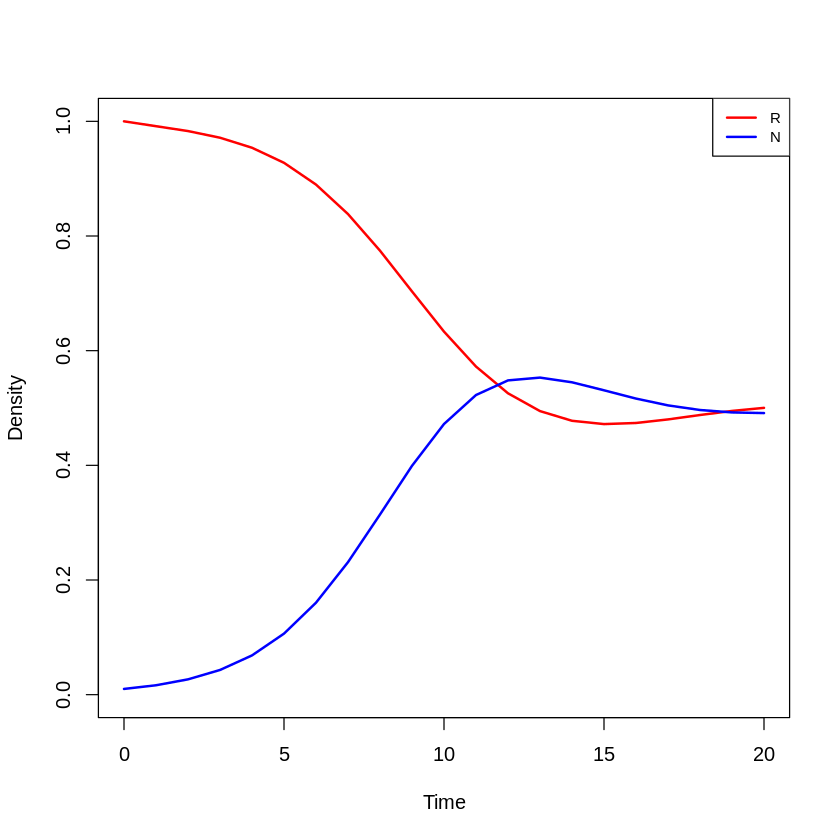

In [7]:
data <- run(20, table = T)

Vamos a generar un vector aleatorio de condiciones iniciales para la optimización

In [8]:
s <- s*abs(rnorm(2,1,0.1));s

R          N 
0.95179482 0.01056078

Vamos a generar un vector aleatorio de parámetros para la optimización 

In [9]:
p <- p*abs(rnorm(5,1,0.1));p

r         K         a         c     delta 
0.9608661 1.1400181 1.0082369 0.7761858 0.5539317

Utilizamos la función *fit()* para realizar el ajuste considerando los siete parámetros del modelo (5 del vector *p* y 2 del vector *s*)

SSR: 3.430779e-27  Estimates:
    R     N     r     K     a     c delta 
 1.00  0.01  1.00  1.00  1.00  1.00  0.50 


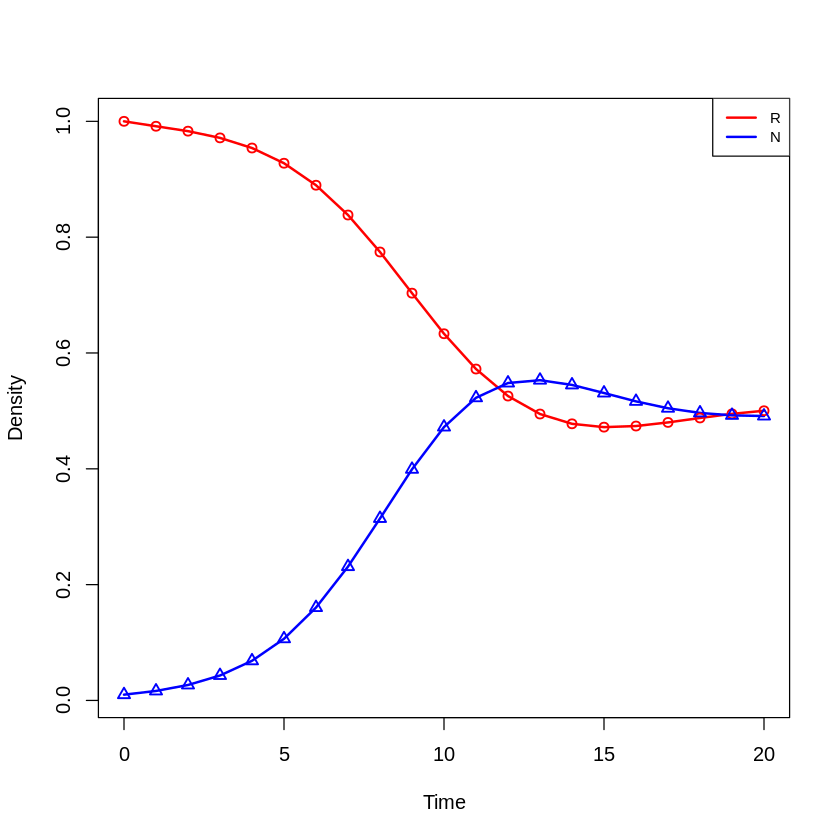

In [11]:
f <- fit()

In [12]:
summary(f)


Parameters:
       Estimate Std. Error   t value Pr(>|t|)    
R     1.000e+00  9.364e-15 1.068e+14   <2e-16 ***
N     1.000e-02  8.860e-16 1.129e+13   <2e-16 ***
r     1.000e+00  5.710e-14 1.751e+13   <2e-16 ***
K     1.000e+00  5.633e-15 1.775e+14   <2e-16 ***
a     1.000e+00  5.580e-14 1.792e+13   <2e-16 ***
c     1.000e+00  5.979e-14 1.673e+13   <2e-16 ***
delta 5.000e-01  1.457e-14 3.431e+13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.901e-15 on 35 degrees of freedom

Parameter correlation:
             R       N        r       K        a       c    delta
R      1.00000 -0.1231 -0.05718 -0.1847 -0.07702  0.1036  0.07079
N     -0.12312  1.0000 -0.37309  0.4328 -0.30596 -0.1084 -0.80631
r     -0.05718 -0.3731  1.00000  0.2049  0.98140 -0.8287  0.10508
K     -0.18469  0.4328  0.20490  1.0000  0.32228 -0.5870 -0.62281
a     -0.07702 -0.3060  0.98140  0.3223  1.00000 -0.8979 -0.02430
c      0.10359 -0.1084 -0.82874 -0.5870

Guradamos los valores obtenidos para el vector *p*

In [13]:
p <- f$par[3:7];p

r     K     a     c delta 
  1.0   1.0   1.0   1.0   0.5

De nuevo generamos un vector aleatorio de parámetros, ahora usamos la solución de la primera optimización. Usamos este vector como solución inicial para la siguiente optimización

In [14]:
p <- p*abs(rnorm(5,1,0.1));p

r         K         a         c     delta 
1.0472387 1.0657216 1.0502729 0.9893132 0.4238524

Guardamos el nombre de los parámetros que deseamos optimizar en *w*. Ahora establecemos de forma explícita cuales parámetros queremos obtener mediante la optimización. 

SSR: 5.399987e-25  Estimates:
    R     N     r     K     a     c delta 
 1.00  0.01  1.00  1.00  1.00  1.00  0.50 


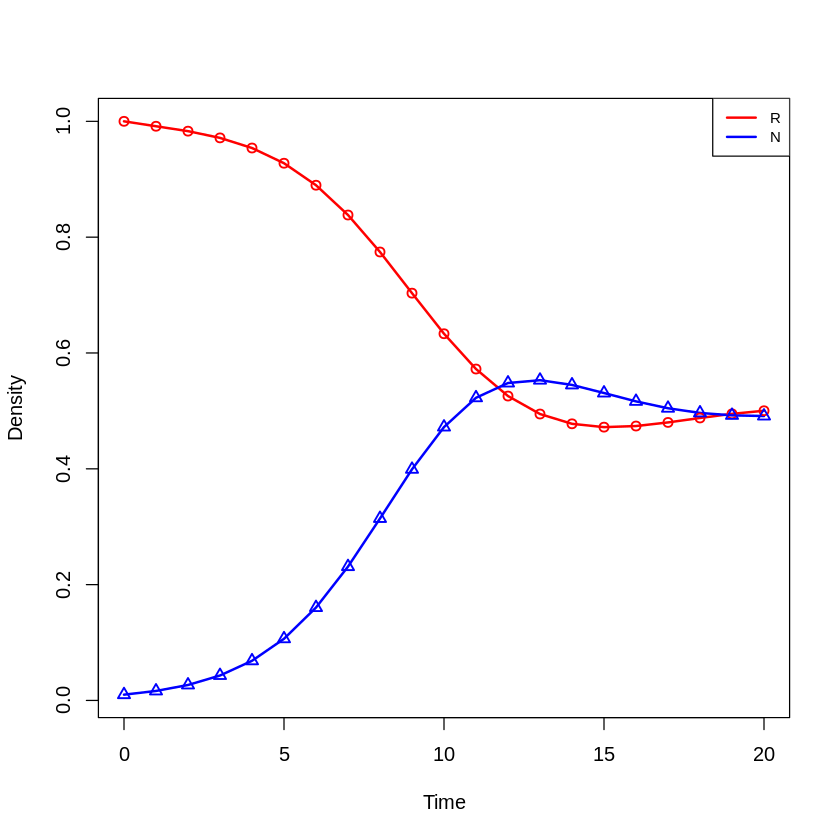

In [15]:
w <- c(names(s), names(p))
f <- fit(data, free = w)

Anteriormente las condiciones iniciales fueron tomadas del vector *s*. Ahora las tomamos directamente de los datos. 

SSR: 4.510411e-25  Estimates:
    r     K     a     c delta 
  1.0   1.0   1.0   1.0   0.5 


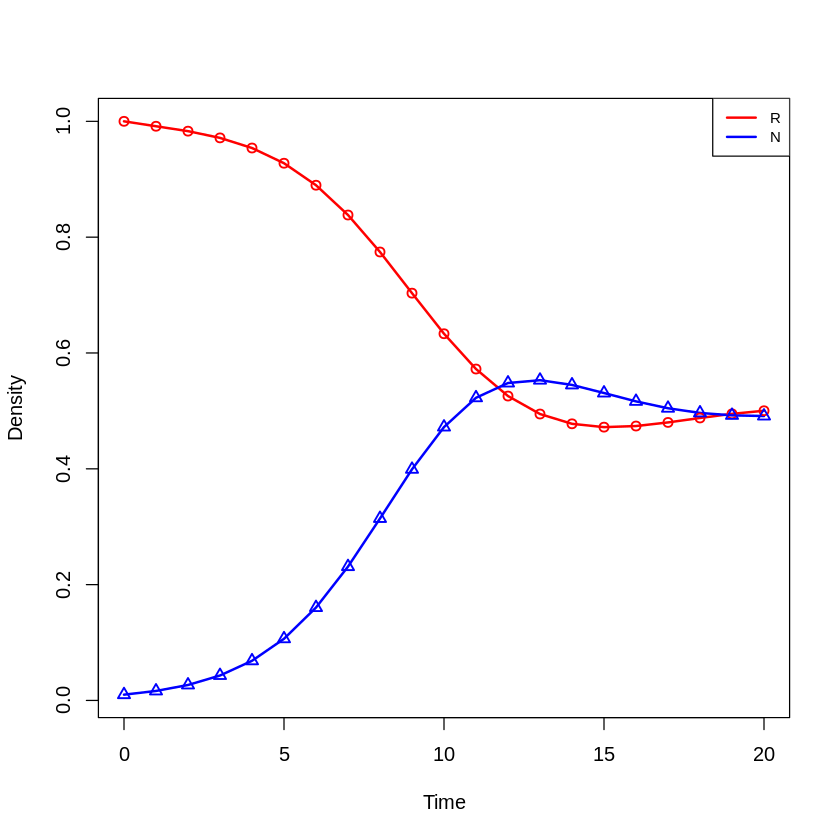

In [16]:
f <- fit(data, initial = T, free = names(p))

Al decirle a la función que tome las condiciones iniciales de los datos, ya no se preocupa por encontrar estos valores mediante la optimización.

Es posible hacer optimización paramétrica empleando dos conjunto de datos diferentes

In [18]:
dataR <- data
dataR$N <- NULL
dataN <- data
dataN$R <- NULL

SSR: 1.01728e-24  Estimates:
    R     N     r     K     a     c delta 
 1.00  0.01  1.00  1.00  1.00  1.00  0.50 


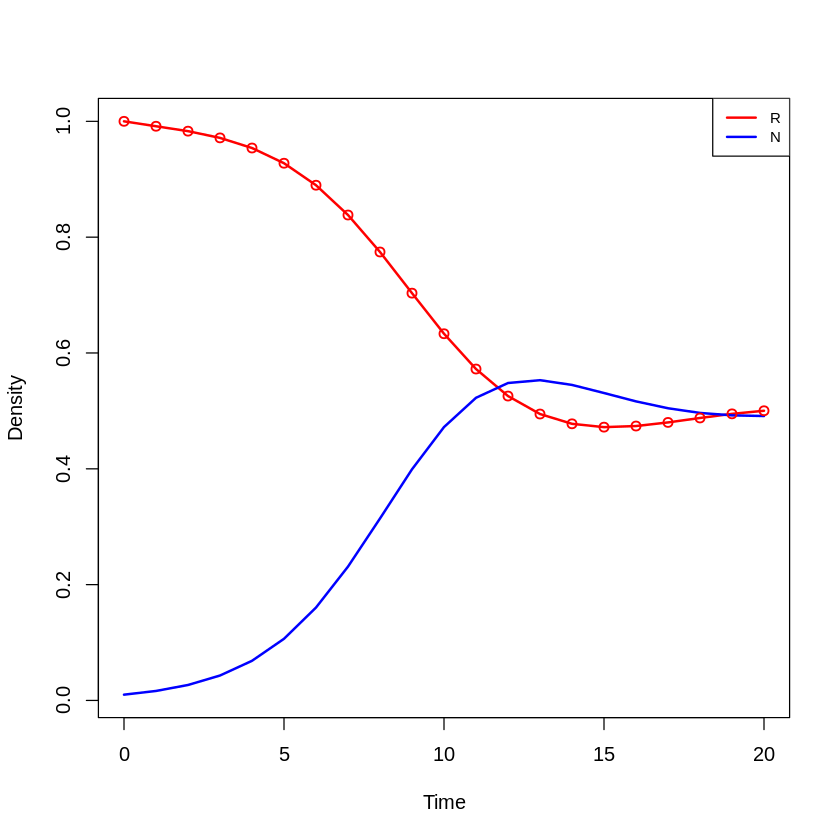

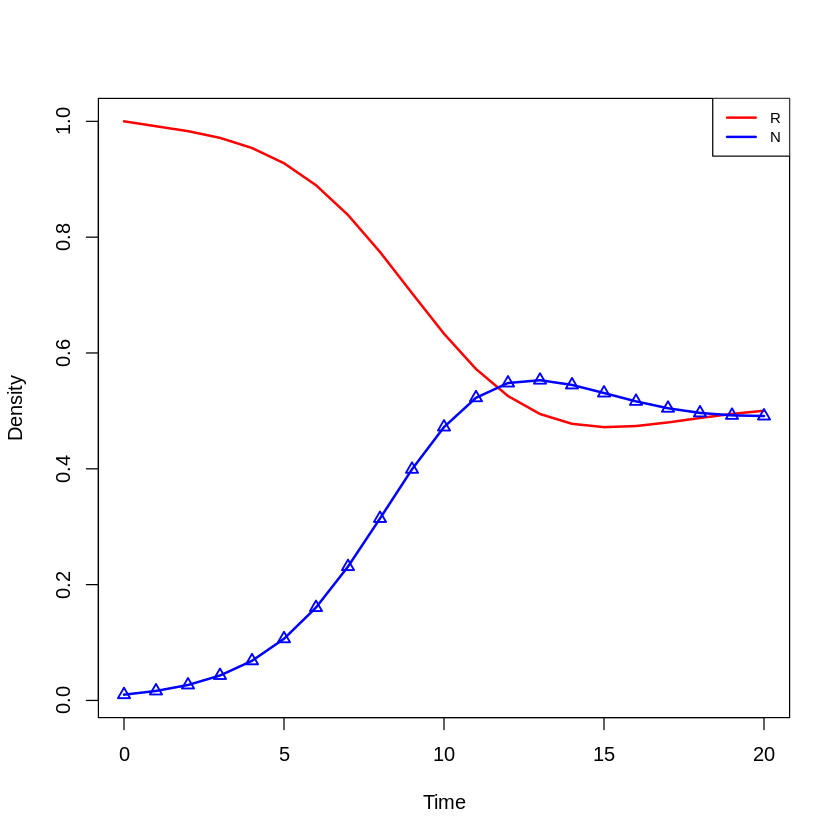

In [21]:
f <- fit(list(dataR, dataN))

Vemos que aunque se separaron los datos, el resultado es el mismo

¿Qué ocurre si algunos de los parámetros son diferentes para cada conjunto de datos?

Primer conjunto de datos 

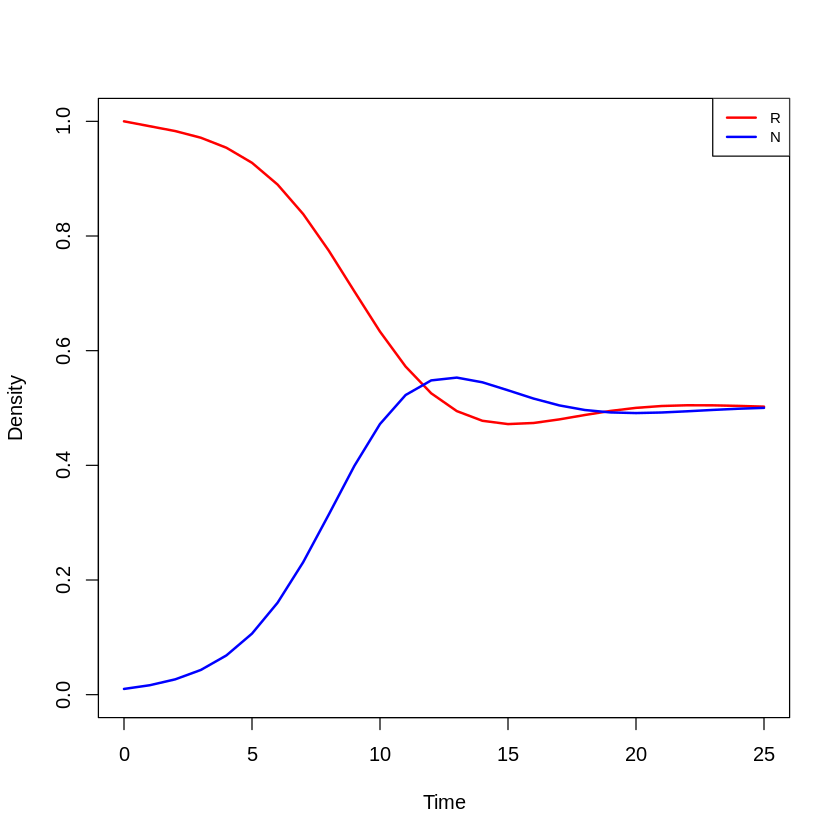

In [24]:
p <- c(r = 1, K = 1, a = 1, c= 1, delta = 0.5)
s <- c(R = 1,N = 0.01)
data1 <- run(25, table = TRUE)

Segundo conjunto de datos

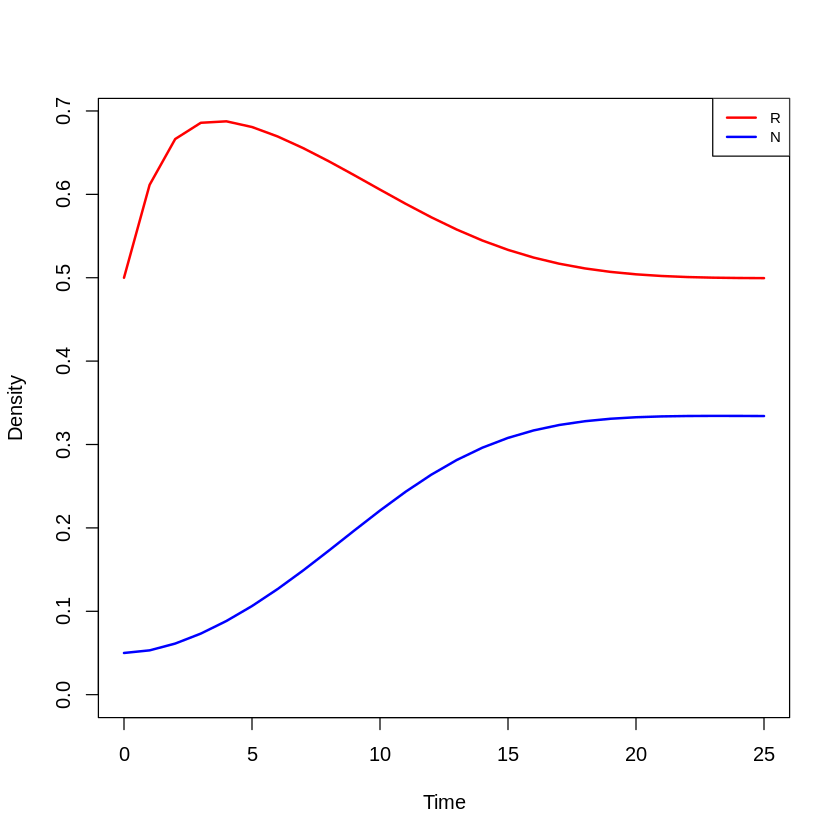

In [25]:
p["K"] <- 0.75
s <- c(R = 0.5, N = 0.05)
data2 <- run(25, table = TRUE)

Viendo los dos conjuntos de datos, podrías proponer un vector de condiciones iniciales promedio como solución inicial para el algoritmo.

SSR: 8.930486e-27  Estimates:
   R    N    K    R    N    K 
1.00 0.01 1.00 0.50 0.05 0.75 


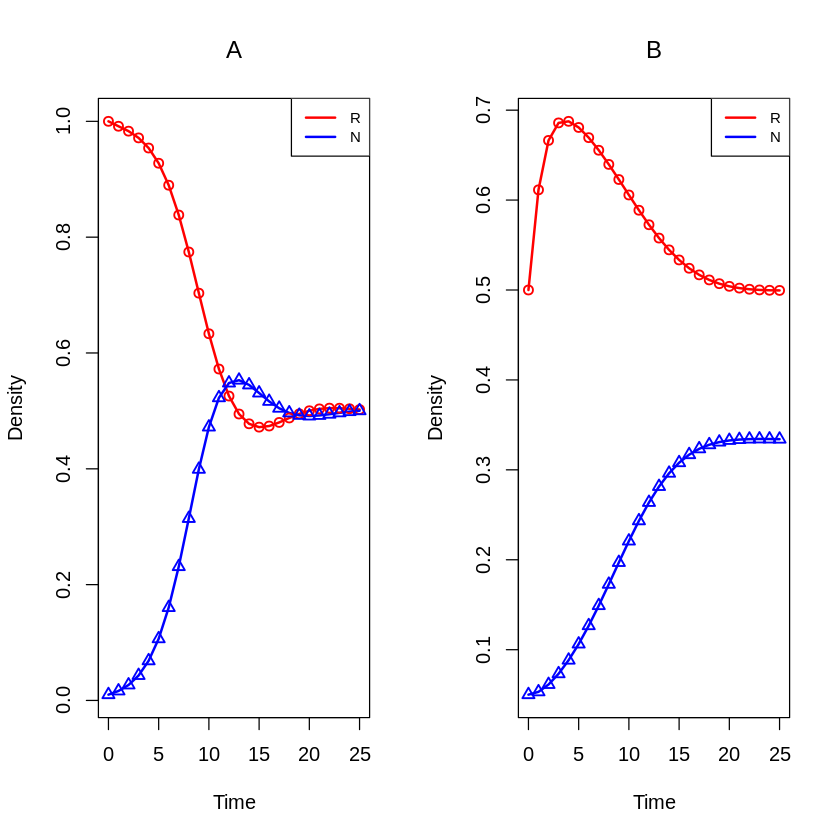

In [26]:
s <- c(R = 0.75, N = 0.02)
par(mfrow = c(1,2))
f <- fit(list(data1, data2), differ = c("R", "N", "K"), main = c("A", "B"))

Con el argumento *differ* estableces cuáles son los parámetros que deben diferir entre los datos. De esta manera la función *fit()* determina los parámetros para cada conjunto de datos

También se pueden dar soluciones iniciales al algoritmo de manera individual. De nuevo usando el argumento *differ*

SSR: 1.042736e-24  Estimates:
   R    N    K    R    N    K 
1.00 0.01 1.00 0.50 0.05 0.75 


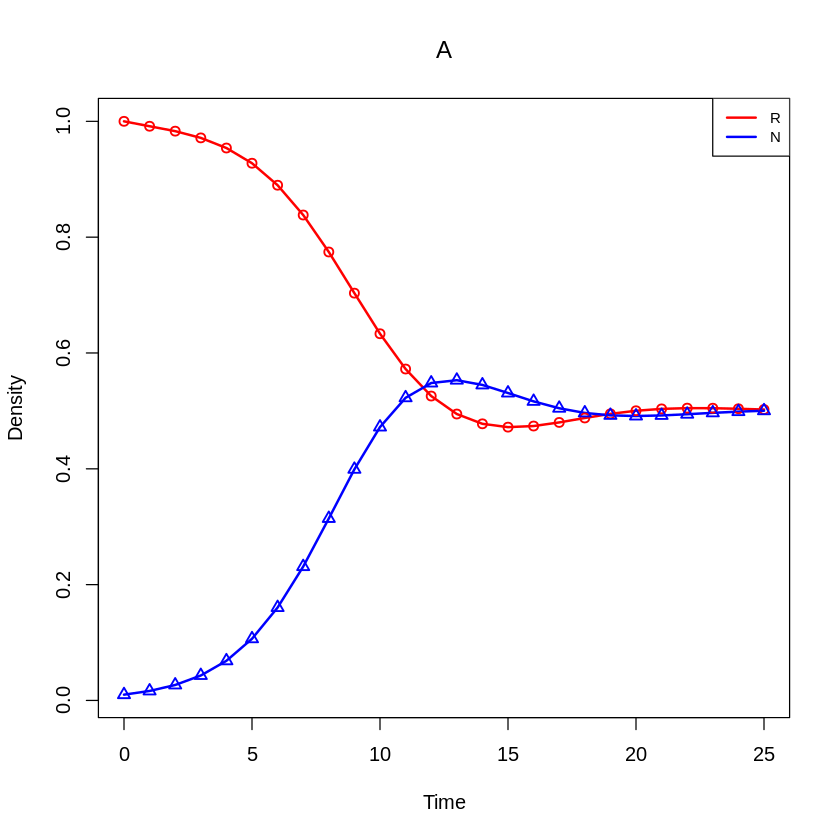

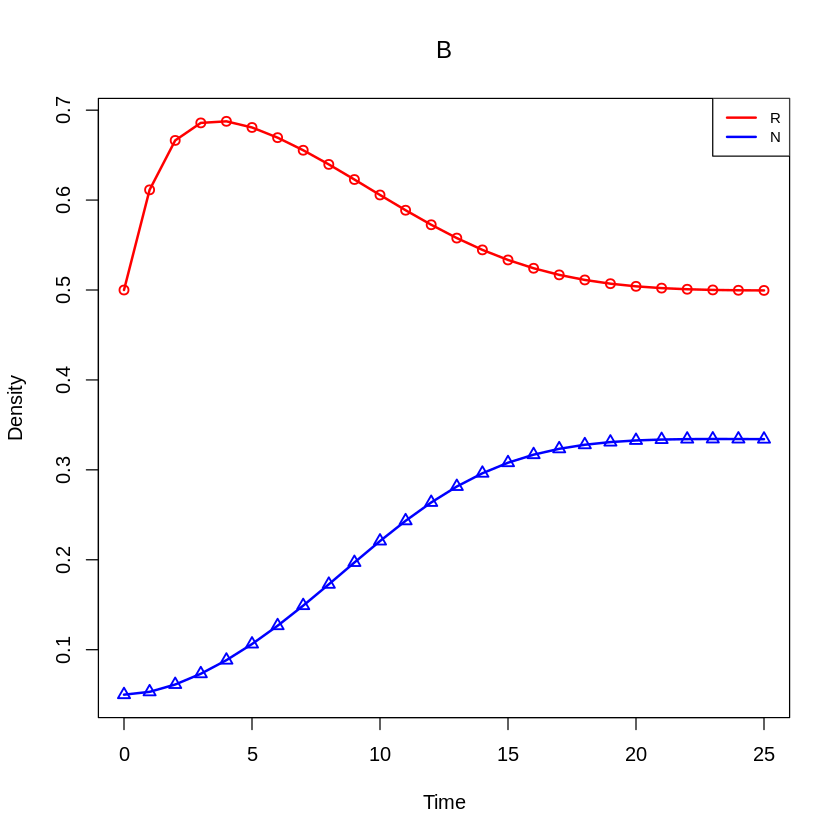

In [28]:
differ <- list(R = c(0.9,0.55), N = c(0.02,0.04), K = c(1.1,0.7))
f <- fit(list(data1, data2), differ = differ, main = c("A", "B"))

Es posible también introducir los parámetros que prmaneserán fijos mediante una lista 

SSR: 2.269343e-25  Estimates:
    r     a     c delta     K     K 
 1.00  1.00  1.00  0.50  1.00  0.75 


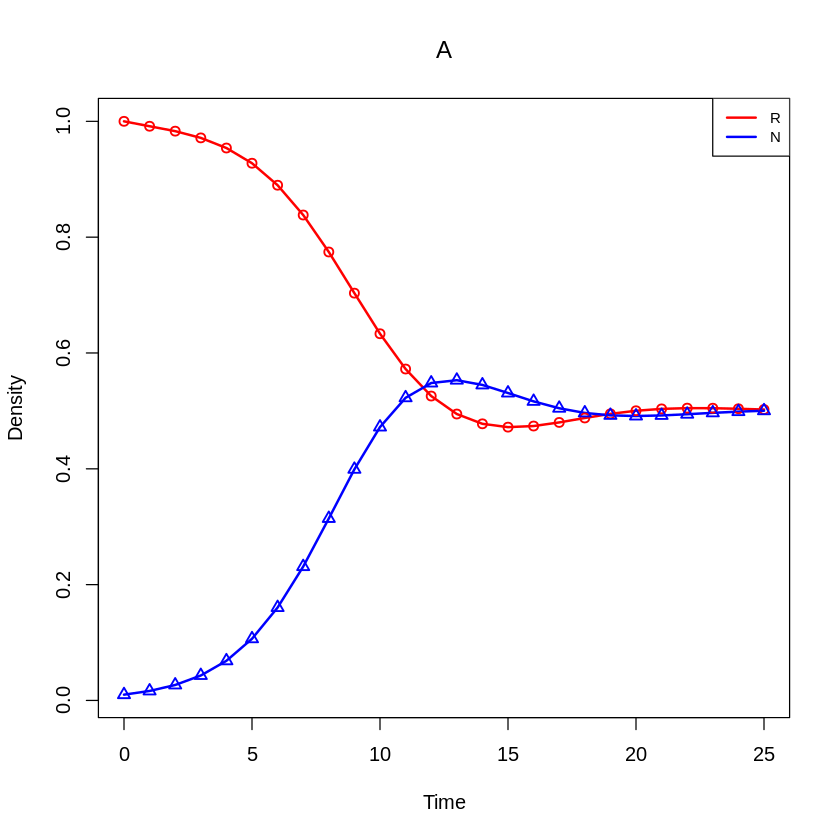

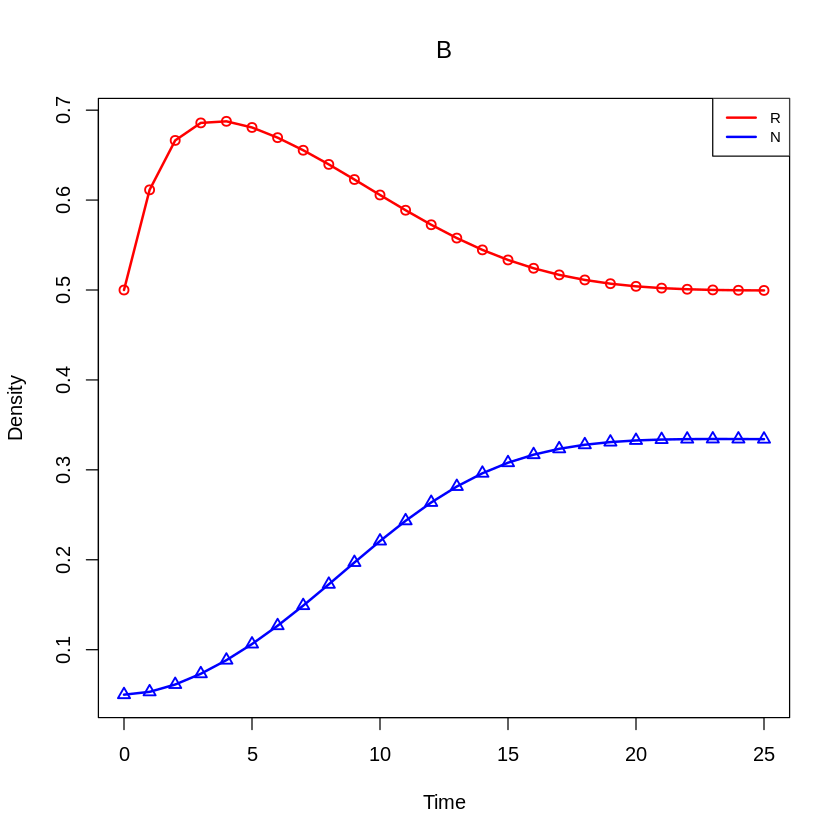

In [29]:
fixed <- list(R = c(1,0.5),N = c(0.01,0.05))
differ <- "K"
free <- names(p)[-2] # toma el nombre de todo el vector 'p' a excepción de 'K'
f <- fit(list(data1, data2), free = free, differ = differ, fixed = fixed, main = c("A", "B"))

De esta manera la función solo debe trabajar en encontrar un conjunto de valores para los parámetros *r*, *a*, *c*, *delta* y dos valores de *K* (uno para cadaconjunto de datos) 